# Reproducing the Paper Figures

This notebook is dedicated to reproducing figures from the paper.

# Libraries

In [190]:
%matplotlib widget

# Essential Libraries 
import numpy as np 
import pandas as pd 

# Plotting & Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import Normalize
import matplotlib as mpl

# Date & Time Handling
from datetime import datetime

# Statistical & Mathematical Operations
import scipy 
import statsmodels.api as sm
from scipy.stats import norm, entropy

# Machine Learning Models & Tools
import sklearn
from sklearn import svm, neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, RationalQuadratic, ConstantKernel
from xgboost import XGBRegressor

# Preprocessing & Feature Engineering
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV, KFold
from sklearn.metrics import f1_score, mean_squared_error, r2_score, make_scorer, mean_absolute_percentage_error, mean_absolute_error

# Dimensionality Reduction
from sklearn.manifold import TSNE

# Misc.
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [191]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Functions

In [43]:
from hte_li_brine_ai import *

# Load Experimentally obtained batches

In [44]:
batch0 = pd.read_excel('data/clean/batch0_labeled.xlsx')
batch1 = pd.read_excel('data/clean/batch1_labeled.xlsx')
batch2 = pd.read_excel('data/clean/batch2_labeled.xlsx')


In [45]:
batch0 = batch0[batch0['T']==66]
batch0.head()

Sample_id  init_C  init_N  init_Li   T   fini_Li     yield acq_policy
0  CS-NRCan-014_A1     0.5     4.5      1.0  66  0.720406  0.279594        EXP
1  CS-NRCan-014_A2     1.0     4.5      1.0  66  0.660309  0.339691        EXP
2  CS-NRCan-014_A3     1.5     4.5      1.0  66  0.735669  0.264331        EXP
3  CS-NRCan-014_A5     1.0     6.0      1.0  66  0.621322  0.378678        EXP
4  CS-NRCan-014_A6     1.5     6.0      1.0  66  0.655983  0.344017        EXP

In [46]:
batch1.head()

Sample_id  init_C  init_N  init_Li   T  fini_Li     yield  \
0  CS-NRCan-CO2-003_B6   2.488    6.00    2.735  66     0.73  0.733090   
1  CS-NRCan-CO2-003_B2   1.980    6.00    2.498  66     0.71  0.715773   
2  CS-NRCan-CO2-003_C5   2.536    5.25    2.498  66     0.76  0.695757   
3  CS-NRCan-CO2-003_B5   2.170    5.75    2.020  66     0.78  0.613861   
4  CS-NRCan-CO2-003_C4   2.550    5.75    3.450  66     0.69  0.800000   

  acq_policy  
0         HY  
1         HY  
2         HY  
3         HY  
4         HY

In [47]:
batch2.head(100)

Sample_id        init_C        init_N       init_Li   T  \
0     CS-NRCan-CO2-004_A1  3.100000e-01  5.330000e+00  8.300000e-01  66   
1     CS-NRCan-CO2-005_B1  9.242530e-01  2.170000e+00  2.000000e+00  66   
2     CS-NRCan-CO2-006_A2  7.490076e-01  3.500000e+00  5.000000e-01  66   
3     CS-NRCan-CO2-007_A3  9.965208e-01  3.830000e+00  2.330000e+00  66   
4     CS-NRCan-CO2-008_B5  1.368558e+00  3.000000e+00  3.000000e+00  66   
5     CS-NRCan-CO2-009_B2  1.635217e+00  3.830000e+00  3.500000e+00  66   
6     CS-NRCan-CO2-010_A4  1.534567e+00  5.330000e+00  3.670000e+00  66   
7     CS-NRCan-CO2-011_B3  1.919602e+00  4.500000e+00  3.670000e+00  66   
8     CS-NRCan-CO2-012_A6  1.993561e+00  5.000000e+00  1.830000e+00  66   
9    below-detection_B3-0  1.666667e-01  3.333333e-01  1.666667e-01  66   
10   below-detection_B3-1  1.666667e-01  1.166667e+00  1.666667e-01  66   
11   below-detection_B3-2  1.666667e-01  2.000000e+00  1.666667e-01  66   
12   below-detection_B3-3  1.666667e-01  2.833333e+00  1.666667e-01  66   
13   below-detection_B3-4  1.000000e+00  2.000000e+00  1.666667e-01  66   
14   below-detection_B3-5  1.666667e-01  3.666667e+00  1.666667e-01  66   
15   below-detection_B3-6  2.500000e+00  6.000000e+00  1.666667e-01  66   
16   below-detection_B3-7  1.333333e+00  2.833333e+00  1.666667e-01  66   
17   below-detection_B3-8  1.000000e-10  1.000000e-10  1.000000e-10  66   
18   below-detection_B3-9  2.500000e+00  5.000000e+00  1.666667e-01  66   
19  below-detection_B3-10  2.000000e+00  4.000000e+00  1.666667e-01  66   
20  below-detection_B3-11  1.166667e+00  4.833333e+00  3.333333e-01  66   
21  below-detection_B3-12  1.000000e+00  5.666667e+00  1.666667e-01  66   
22  below-detection_B3-13  3.333333e-01  4.500000e+00  1.666667e-01  66   

         fini_Li     yield acq_policy  
0   6.500000e-01  0.216867        RND  
1   9.000000e-01  0.550000        RND  
2   5.000000e-01  0.000000        RND  
3   8.500000e-01  0.635193         HY  
4   1.080000e+00  0.640000         HY  
5   9.800000e-01  0.720000         HY  
6   8.200000e-01  0.776567         HY  
7   8.300000e-01  0.773842         HY  
8   8.400000e-01  0.540984         HY  
9   1.666667e-01  0.000000        HAG  
10  1.666667e-01  0.000000        HAG  
11  1.666667e-01  0.000000        HAG  
12  1.666667e-01  0.000000        HAG  
13  1.666667e-01  0.000000        HAG  
14  1.666667e-01  0.000000        HAG  
15  1.666667e-01  0.000000        HAG  
16  1.666667e-01  0.000000        HAG  
17  1.000000e-10  0.000000        HAG  
18  1.666667e-01  0.000000        HAG  
19  1.666667e-01  0.000000        HAG  
20  3.333333e-01  0.000000        RND  
21  1.666667e-01  0.000000        RND  
22  1.666667e-01  0.000000        RND

### Visual inspection of experimental data:

In [48]:
batch_0_1 = pd.concat([batch0, batch1])
batch_0_2 = pd.concat([batch_0_1, batch2])

In [49]:
batch_0_1.head(100)

Sample_id  init_C  init_N  init_Li   T   fini_Li     yield  \
0       CS-NRCan-014_A1   0.500    4.50    1.000  66  0.720406  0.279594   
1       CS-NRCan-014_A2   1.000    4.50    1.000  66  0.660309  0.339691   
2       CS-NRCan-014_A3   1.500    4.50    1.000  66  0.735669  0.264331   
3       CS-NRCan-014_A5   1.000    6.00    1.000  66  0.621322  0.378678   
4       CS-NRCan-014_A6   1.500    6.00    1.000  66  0.655983  0.344017   
5       CS-NRCan-014_B1   0.500    4.50    1.500  66  0.743583  0.504278   
6       CS-NRCan-014_B2   1.000    4.50    1.500  66  0.676082  0.549278   
7       CS-NRCan-014_B3   1.500    4.50    1.500  66  0.737735  0.508177   
8       CS-NRCan-014_B4   0.500    6.00    1.500  66  0.753881  0.497413   
9       CS-NRCan-014_B5   1.000    6.00    1.500  66  0.816910  0.455393   
10      CS-NRCan-014_B6   1.500    6.00    1.500  66  0.679802  0.546798   
11      CS-NRCan-014_C1   0.500    4.50    2.000  66  1.008891  0.495555   
12      CS-NRCan-014_C2   1.000    4.50    2.000  66  1.039333  0.480334   
13      CS-NRCan-014_C3   1.500    4.50    2.000  66  0.777057  0.611471   
14      CS-NRCan-014_C4   0.500    6.00    2.000  66  0.983451  0.508274   
15      CS-NRCan-014_C5   1.000    6.00    2.000  66  0.715698  0.642151   
16      CS-NRCan-014_C6   1.500    6.00    2.000  66  0.694631  0.652685   
0   CS-NRCan-CO2-003_B6   2.488    6.00    2.735  66  0.730000  0.733090   
1   CS-NRCan-CO2-003_B2   1.980    6.00    2.498  66  0.710000  0.715773   
2   CS-NRCan-CO2-003_C5   2.536    5.25    2.498  66  0.760000  0.695757   
3   CS-NRCan-CO2-003_B5   2.170    5.75    2.020  66  0.780000  0.613861   
4   CS-NRCan-CO2-003_C4   2.550    5.75    3.450  66  0.690000  0.800000   
5   CS-NRCan-CO2-003_B3   2.120    6.00    3.450  66  0.670000  0.805797   
6   CS-NRCan-CO2-003_D4   2.560    5.00    3.210  66  0.810000  0.747664   
7   CS-NRCan-CO2-003_A4   1.610    6.00    3.210  66  0.780000  0.757009   
8   CS-NRCan-CO2-003_A5   1.710    5.75    1.790  66  0.820000  0.541899   
9   CS-NRCan-CO2-003_A3   1.360    5.75    2.500  66  0.780000  0.688000   
10  CS-NRCan-CO2-003_C1   2.490    6.00    4.160  66  0.690000  0.834135   
11  CS-NRCan-CO2-003_B4   1.680    4.75    2.740  66  0.790000  0.711679   
12  CS-NRCan-CO2-003_D1   2.050    4.25    1.790  66  0.890000  0.502793   
13  CS-NRCan-CO2-003_D5   2.560    5.00    4.160  66  0.810000  0.805288   
14  CS-NRCan-CO2-003_D2   1.810    3.75    2.740  66  0.850000  0.689781   
15  CS-NRCan-CO2-003_A2   0.690    3.25    1.310  66  0.750000  0.427481   
16  CS-NRCan-CO2-003_C2   2.490    6.00    1.310  66  0.880000  0.328244   
17  CS-NRCan-CO2-003_A6   1.900    5.75    0.800  66  0.800000  0.000000   
18  CS-NRCan-CO2-003_D6   0.770    1.50    1.110  66  0.860000  0.225225   
19  CS-NRCan-CO2-003_C3   1.240    3.00    2.020  66  0.880000  0.564356   
20  CS-NRCan-CO2-003_C6   2.540    5.25    1.110  66  0.960000  0.135135   
21  CS-NRCan-CO2-003_D3   1.570    3.25    1.110  66  0.820000  0.261261   
22  CS-NRCan-CO2-003_B1   0.820    2.50    1.110  66  0.750000  0.324324   
23  CS-NRCan-CO2-003_A1   0.370    6.00    0.430  66  0.430000  0.000000   

   acq_policy  
0         EXP  
1         EXP  
2         EXP  
3         EXP  
4         EXP  
5         EXP  
6         EXP  
7         EXP  
8         EXP  
9         EXP  
10        EXP  
11        EXP  
12        EXP  
13        EXP  
14        EXP  
15        EXP  
16        EXP  
0          HY  
1          HY  
2          HY  
3          HY  
4          HY  
5          HY  
6          HY  
7          HY  
8          HY  
9          HY  
10         HY  
11         HY  
12        HAG  
13        HAG  
14        HAG  
15        HAG  
16        HAG  
17        HAG  
18        RND  
19        RND  
20        RND  
21        RND  
22        RND  
23        RND

In [50]:
batch_0_2.head(100)

Sample_id    init_C    init_N   init_Li   T   fini_Li  \
0         CS-NRCan-014_A1  0.500000  4.500000  1.000000  66  0.720406   
1         CS-NRCan-014_A2  1.000000  4.500000  1.000000  66  0.660309   
2         CS-NRCan-014_A3  1.500000  4.500000  1.000000  66  0.735669   
3         CS-NRCan-014_A5  1.000000  6.000000  1.000000  66  0.621322   
4         CS-NRCan-014_A6  1.500000  6.000000  1.000000  66  0.655983   
..                    ...       ...       ...       ...  ..       ...   
18   below-detection_B3-9  2.500000  5.000000  0.166667  66  0.166667   
19  below-detection_B3-10  2.000000  4.000000  0.166667  66  0.166667   
20  below-detection_B3-11  1.166667  4.833333  0.333333  66  0.333333   
21  below-detection_B3-12  1.000000  5.666667  0.166667  66  0.166667   
22  below-detection_B3-13  0.333333  4.500000  0.166667  66  0.166667   

       yield acq_policy  
0   0.279594        EXP  
1   0.339691        EXP  
2   0.264331        EXP  
3   0.378678        EXP  
4   0.344017        EXP  
..       ...        ...  
18  0.000000        HAG  
19  0.000000        HAG  
20  0.000000        RND  
21  0.000000        RND  
22  0.000000        RND  

[64 rows x 8 columns]

In [51]:
print(batch_0_2.columns)

Index(['Sample_id', 'init_C', 'init_N', 'init_Li', 'T', 'fini_Li', 'yield',
       'acq_policy'],
      dtype='object')


KeyboardInterrupt: 

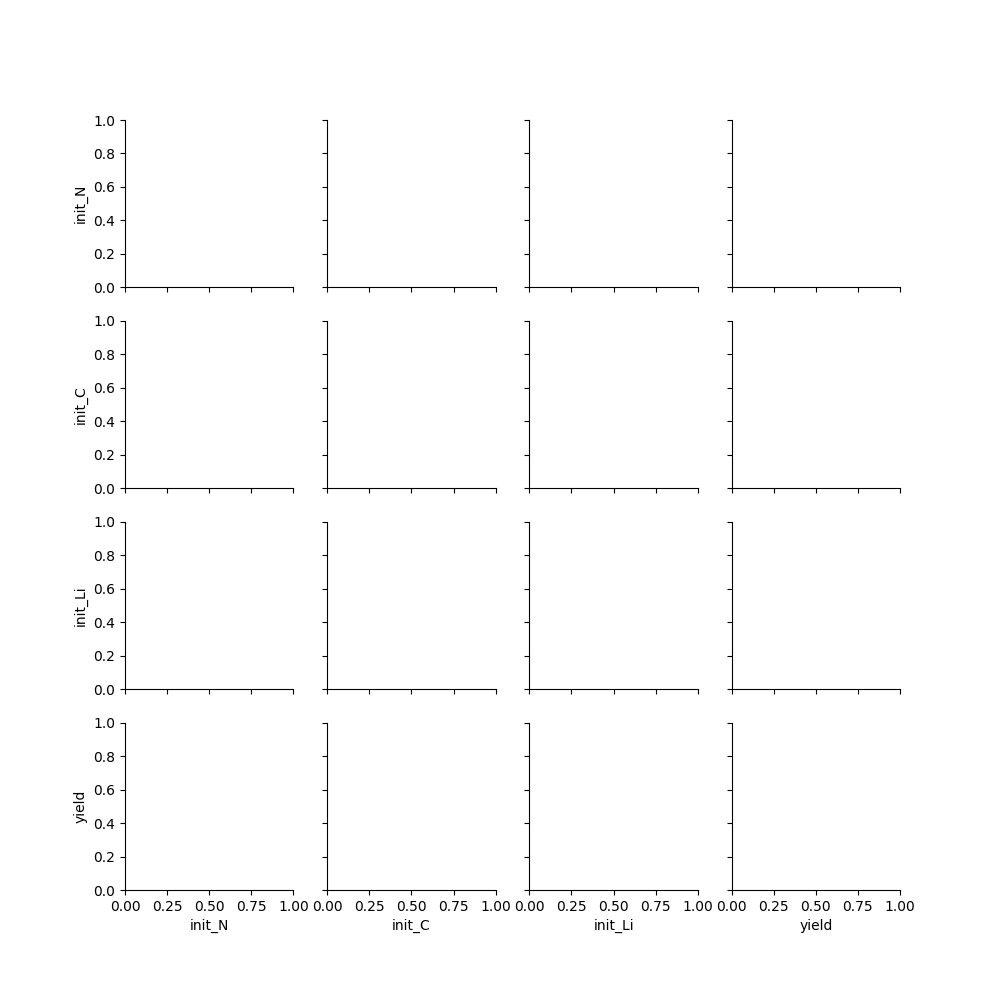

In [52]:
sns.pairplot(batch_0_2, x_vars=['init_N', 'init_C', 'init_Li', 'yield'],
             y_vars=['init_N', 'init_C', 'init_Li', 'yield'], palette='viridis')
plt.show()

# GPR Prediction Results
 

## Visualizing the model evolution

>Scale the data
>
>Define 3 different models, one for each batch. 
>
>Train each model with the data from each batch.
>
>eighther define the experimental space and plot the vizualization of the prediction in a good cross section.

In [ ]:
def binary_model_plot_v3(model, scaler, range_a, range_b, val_c,
                         label_a, label_b , label_c, entropy_contour=False,
                         std_contour=True, yield_contour=True, vmin=0.1, vmax=0.7):

    
    a_list = np.linspace(range_a[0], range_a[1], 70)
    b_list = np.linspace(range_b[0], range_b[1], 70)

    a_mesh, b_mesh = np.meshgrid(a_list, b_list)
    yield_mesh = a_mesh.copy()
    std_mesh = a_mesh.copy()
    entropy_mesh = a_mesh.copy()
    
    for i in tqdm(range(len(a_list))):
        for j in range(len(b_list)):
            x_df = pd.DataFrame({label_a: a_mesh[i,j],
                                 label_b : b_mesh[i,j],
                                 label_c : [val_c]})
            # it is crucial to rearrange the columns in the same order as the training data!!!
            x_df = x_df[['init_C', 'init_N', 'init_Li']]
            
            scaled_grid = scaler.transform(x_df)
            yield_mesh[i,j], std_mesh[i,j] = model.predict(scaled_grid, return_std=True)
            yield_mesh[i,j] = np.maximum(0, yield_mesh[i,j])
            if entropy_contour:
                entropy_mesh[i,j] = entropy_measure(std_mesh[i,j])
            
    plt.figure(figsize=(4.5,3.9))
    
    #contour_plot = plt.contourf(a_mesh, b_mesh, yield_mesh, 100, cmap = 'viridis', vmin=vmin, vmax=vmax)
    contour_plot = plt.contourf(a_mesh, b_mesh, yield_mesh,cmap = 'viridis', levels=np.linspace(vmin,vmax,400))
    cbar = plt.colorbar(contour_plot, norm = Normalize(vmin=vmin, vmax=vmax))
    # Specify the tickmark locations
    tickmarks = np.arange(vmin, vmax, 0.1)  # change step size as needed

    # Set the tickmarks on the colorbar
    cbar.set_ticks(tickmarks)
    
    if std_contour:
        contour1 = plt.contour(a_mesh, b_mesh, std_mesh, colors = 'red')
        plt.clabel(contour1, inline=True, fontsize=10)
    
    if yield_contour:
        contour2 = plt.contour(a_mesh, b_mesh, yield_mesh, 9, linestyles='-.', colors = 'black')
        plt.clabel(contour2, inline=True, fontsize=10)
    
    if entropy_contour:
        contour3 = plt.contour(a_mesh, b_mesh, entropy_mesh, colors = 'blue')
        plt.clabel(contour3, inline=True, fontsize=10)
    
        
    
    plt.xlabel(label_a)
    plt.ylabel(label_b)
    cbar.ax.set_ylabel('Yield')
    plt.title(label_c + ": " + str(val_c))
    plt.show()
    plt.tight_layout()
    
    return a_mesh, b_mesh, yield_mesh, std_mesh, entropy_mesh


In [ ]:
# scale the data

scale_0 = StandardScaler().fit(batch0[['init_C', 'init_N', 'init_Li']])
scale_1 = StandardScaler().fit(batch1[['init_C', 'init_N', 'init_Li']])
scale_2 = StandardScaler().fit(batch2[['init_C', 'init_N', 'init_Li']])
scale_0_1 = StandardScaler().fit(batch_0_1[['init_C', 'init_N', 'init_Li']])
scale_0_2 = StandardScaler().fit(batch_0_2[['init_C', 'init_N', 'init_Li']])

batch0_scaled = scale_0.transform(batch0[['init_C', 'init_N', 'init_Li']])
batch1_scaled = scale_1.transform(batch1[['init_C', 'init_N', 'init_Li']])
batch2_scaled = scale_2.transform(batch2[['init_C', 'init_N', 'init_Li']])
batch_0_1_scaled = scale_0_1.transform(batch_0_1[['init_C', 'init_N', 'init_Li']])
batch_0_2_scaled = scale_0_2.transform(batch_0_2[['init_C', 'init_N', 'init_Li']])  

In [ ]:
# define 3 models with with kernels with 3 different lengthscales
gpr_model_0 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=10)
gpr_model_1 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=10)
gpr_model_2 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=10)

gpr_model_0_1 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=10)
gpr_model_0_2 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-5, n_restarts_optimizer=10)

In [ ]:
gpr_model_0.fit(batch0_scaled, batch0['yield'])
gpr_model_1.fit(batch1_scaled, batch1['yield'])
gpr_model_2.fit(batch2_scaled, batch2['yield'])
gpr_model_0_1.fit(batch_0_1_scaled, batch_0_1['yield'])
gpr_model_0_2.fit(batch_0_2_scaled, batch_0_2['yield'])

print(gpr_model_0.kernel_)
print(gpr_model_1.kernel_)
print(gpr_model_2.kernel_)
print(gpr_model_0_1.kernel_)
print(gpr_model_0_2.kernel_)    

Matern(length_scale=[10.1, 13.7, 7.76], nu=1.5)
Matern(length_scale=[29.5, 12.6, 6.53], nu=1.5)
Matern(length_scale=[834, 1e+05, 2.61], nu=1.5)
Matern(length_scale=[5.76, 14.2, 4.34], nu=1.5)
Matern(length_scale=[7.17, 13, 2.56], nu=1.5)


### Saving GPR models for each iteration of the active learning

In [ ]:
import pickle

# Pickle scalers
with open('models/feature_standard_scaler_AL_iteration_0.pkl', 'wb') as f:
    pickle.dump(scale_0, f)
with open('models/feature_standard_scaler_AL_iteration_1.pkl', 'wb') as f:
    pickle.dump(scale_0_1, f)
with open('models/feature_standard_scaler_AL_iteration_2.pkl', 'wb') as f:
    pickle.dump(scale_0_2, f)

# Pickle models
with open('models/GPR_model_AL_iteration_0.pkl', 'wb') as f:
    pickle.dump(gpr_model_0, f)
with open('models/GPR_model_AL_iteration_1.pkl', 'wb') as f:
    pickle.dump(gpr_model_0_1, f)
with open('models/GPR_model_AL_iteration_2.pkl', 'wb') as f:
    pickle.dump(gpr_model_0_2, f)

### Iteration 0:

Demonstration of different slices of prediction using the data from the first iteration of active learning 

100%|██████████| 70/70 [00:06<00:00, 10.19it/s]


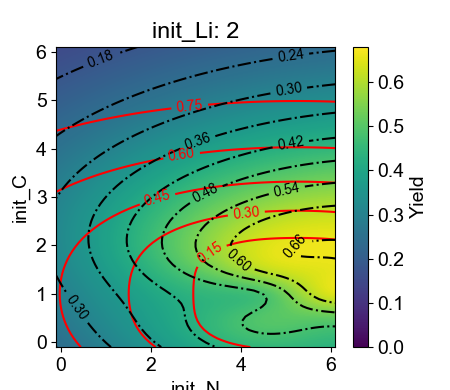

In [ ]:
a_mesh_0, b_mesh_0, yield_mesh_0, std_mesh_0, _ =  binary_model_plot_v3(gpr_model_0,
                                                                     scale_0,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=2,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li',
                                                                     vmin=0, vmax=0.68)

100%|██████████| 70/70 [00:07<00:00,  9.86it/s]


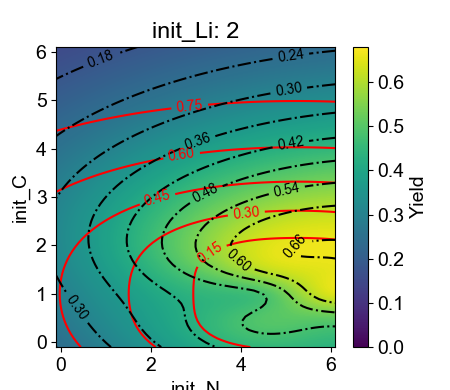

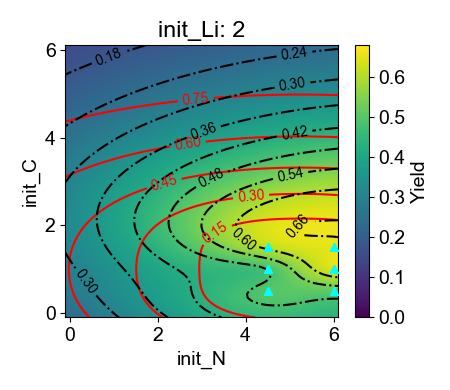

In [ ]:
a_mesh_0, b_mesh_0, yield_mesh_0, std_mesh_0, _ =  binary_model_plot_v3(gpr_model_0,
                                                                     scale_0,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=2,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li',
                                                                     vmin=0, vmax=0.68)

plt.scatter(batch0['init_N'], batch0['init_C'], marker = '^', s=30, color = 'cyan', zorder=10)
plt.tight_layout()
plt.show()


## Iteration 1:

Demonstration of different slices of prediction using the data from the second iteration of active learning 

100%|██████████| 70/70 [00:07<00:00,  8.90it/s]


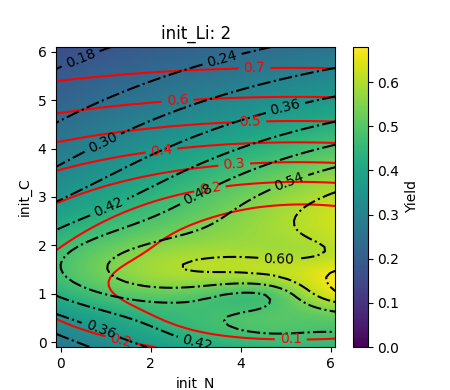

In [ ]:
a_mesh_0_1, b_mesh_0_1, yield_mesh_0_1, std_mesh_0_1 , _ =  binary_model_plot_v3(gpr_model_0_1,
                                                                     scale_0_1,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=2,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li',
                                                                     vmin=0, vmax=0.68)


100%|██████████| 70/70 [00:07<00:00,  9.13it/s]


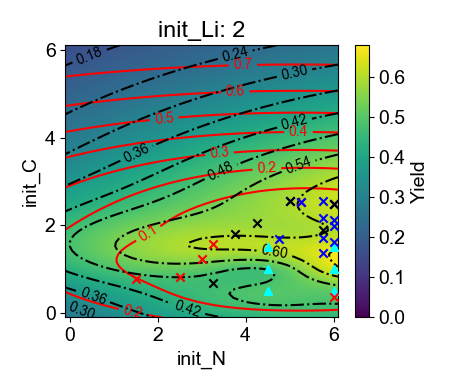

In [ ]:
a_mesh_0_1, b_mesh_0_1, yield_mesh_0_1, std_mesh_0_1 , _ =  binary_model_plot_v3(gpr_model_0_1,
                                                                     scale_0_1,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=2,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li',
                                                                     vmin=0, vmax=0.68)

plt.scatter(batch0['init_N'], batch0['init_C'], marker = '^', s=30, color = 'cyan', zorder=10)

plt.scatter(batch1[batch1['acq_policy']=='RND']['init_N'],
            batch1[batch1['acq_policy']=='RND']['init_C'],
            marker = 'x', s=36, color = 'red', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HY']['init_N'],
            batch1[batch1['acq_policy']=='HY']['init_C'],
            marker = 'x', s=36, color = 'blue', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HAG']['init_N'],
            batch1[batch1['acq_policy']=='HAG']['init_C'],
            marker = 'x', s=36, color = 'black', zorder=15)
plt.tight_layout()
plt.show()

## Iteration 2:

Demonstration of different slices of prediction using the data from the third iteration of active learning 

  0%|          | 0/70 [00:00<?, ?it/s]

100%|██████████| 70/70 [00:07<00:00,  9.10it/s]


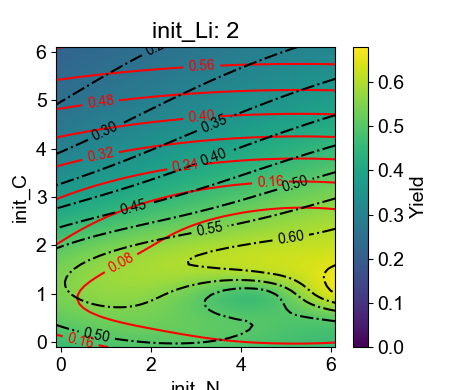

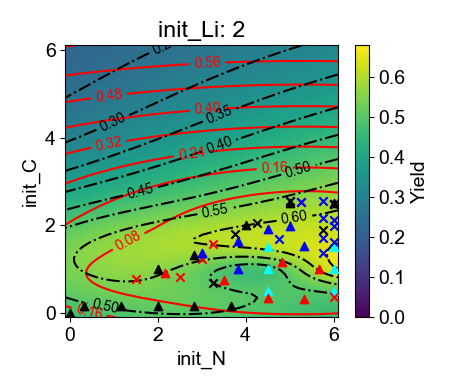

In [ ]:
a_mesh_0_2, b_mesh_0_2, yield_mesh_0_2, std_mesh_0_2 , _ =  binary_model_plot_v3(gpr_model_0_2,
                                                                     scale_0_2,
                                                                     range_a = [-0.1, 6.1],
                                                                     range_b = [-0.1, 6.1],
                                                                     val_c=2,
                                                                     label_a = 'init_N',
                                                                     label_b = 'init_C',
                                                                     label_c = 'init_Li',
                                                                     vmin=0, vmax=0.68)


plt.scatter(batch0['init_N'], batch0['init_C'], marker = '^', s=30, color = 'cyan', zorder=10)

plt.scatter(batch1[batch1['acq_policy']=='RND']['init_N'],
            batch1[batch1['acq_policy']=='RND']['init_C'],
            marker = 'x', s=36, color = 'red', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HY']['init_N'],
            batch1[batch1['acq_policy']=='HY']['init_C'],
            marker = 'x', s=36, color = 'blue', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HAG']['init_N'],
            batch1[batch1['acq_policy']=='HAG']['init_C'],
            marker = 'x', s=36, color = 'black', zorder=15)

plt.scatter(batch2[batch2['acq_policy']=='RND']['init_N'],
            batch2[batch2['acq_policy']=='RND']['init_C'],
            marker = '^', s=36, color = 'red', zorder=40)

plt.scatter(batch2[batch2['acq_policy']=='HY']['init_N'],
            batch2[batch2['acq_policy']=='HY']['init_C'],
            marker = '^', s=36, color = 'blue', zorder=40)

plt.scatter(batch2[batch2['acq_policy']=='HAG']['init_N'],
            batch2[batch2['acq_policy']=='HAG']['init_C'],
            marker = '^', s=36, color = 'black', zorder=40)
plt.tight_layout()
plt.show()

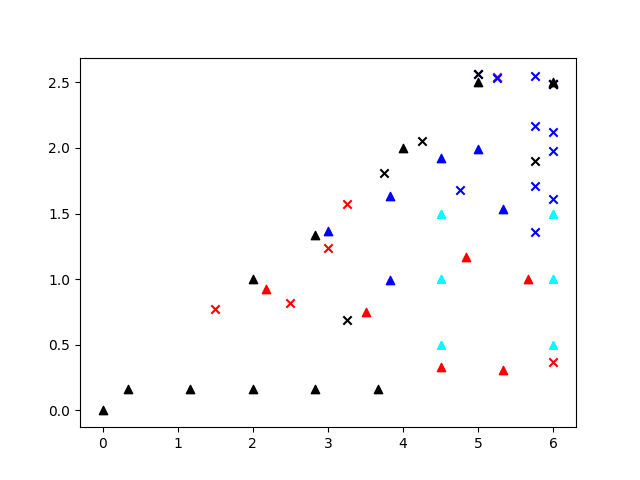

In [ ]:
plt.figure()

plt.scatter(batch0['init_N'], batch0['init_C'], marker = '^', s=30, color = 'cyan', zorder=10)

plt.scatter(batch1[batch1['acq_policy']=='RND']['init_N'],
            batch1[batch1['acq_policy']=='RND']['init_C'],
            marker = 'x', s=36, color = 'red', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HY']['init_N'],
            batch1[batch1['acq_policy']=='HY']['init_C'],
            marker = 'x', s=36, color = 'blue', zorder=15)

plt.scatter(batch1[batch1['acq_policy']=='HAG']['init_N'],
            batch1[batch1['acq_policy']=='HAG']['init_C'],
            marker = 'x', s=36, color = 'black', zorder=15)

plt.scatter(batch2[batch2['acq_policy']=='RND']['init_N'],
            batch2[batch2['acq_policy']=='RND']['init_C'],
            marker = '^', s=36, color = 'red', zorder=40)

plt.scatter(batch2[batch2['acq_policy']=='HY']['init_N'],
            batch2[batch2['acq_policy']=='HY']['init_C'],
            marker = '^', s=36, color = 'blue', zorder=40)

plt.scatter(batch2[batch2['acq_policy']=='HAG']['init_N'],
            batch2[batch2['acq_policy']=='HAG']['init_C'],
            marker = '^', s=36, color = 'black', zorder=40)

In [ ]:
batch2[batch2['acq_policy']=='HAG']

Empty DataFrame
Columns: [Sample_id, init_C, init_N, init_Li, T, fini_Li, yield, acq_policy]
Index: []

## Visualize the highest yield slice: 

100%|██████████| 70/70 [00:09<00:00,  7.48it/s]


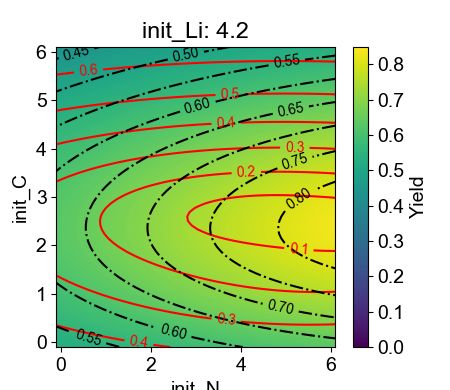

In [ ]:
a_mesh_0, b_mesh_0, yield_mesh_0, std_mesh_0, _ =  binary_model_plot_v3(gpr_model_0_2,
                                                                        scale_0_2,
                                                                        range_a = [-0.1, 6.1],
                                                                        range_b = [-0.1, 6.1],
                                                                        val_c=4.2,
                                                                        label_a = 'init_N',
                                                                        label_b = 'init_C',
                                                                        label_c = 'init_Li',
                                                                        vmin=0.0, vmax=0.85)

In [ ]:
a_mesh_1, b_mesh_1, yield_mesh_1, std_mesh_1, _ =  binary_model_plot_v3(gpr_model_0_2,
                                                                        scale_0_2,
                                                                        range_a = [-0.1, 6.1],
                                                                        range_b = [-0.1, 6.1],
                                                                        val_c=2.5,
                                                                        label_a = 'init_N',
                                                                        label_b = 'init_Li',
                                                                        label_c = 'init_C',
                                                                        vmin=0.0, vmax=0.85)

100%|██████████| 70/70 [00:09<00:00,  7.13it/s]


100%|██████████| 70/70 [00:06<00:00, 10.23it/s]


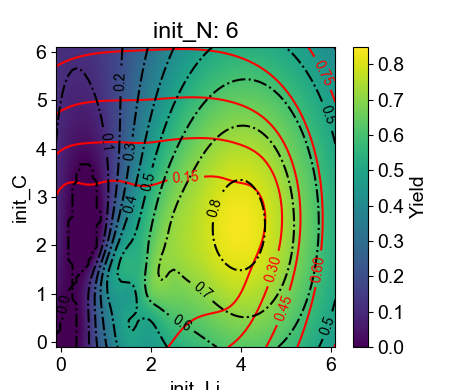

In [ ]:
a_mesh_2, b_mesh_2, yield_mesh_2, std_mesh_2, _ =  binary_model_plot_v3(gpr_model_0_2,
                                                                        scale_0_2,
                                                                        range_a = [-0.1, 6.1],
                                                                        range_b = [-0.1, 6.1],
                                                                        val_c=6,
                                                                        label_a = 'init_Li',
                                                                        label_b = 'init_C',
                                                                        label_c = 'init_N',
                                                                        vmin=0.0, vmax=0.85)

# Experimentally Viable Regions: 

In [ ]:
exp_grid_loaded = pd.read_csv('data\\generated\\exp_grid.csv')
exp_grid = exp_grid_loaded.copy()

exp_grid_feasibility = grid_feasibility_v2(exp_grid_loaded)

fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # 1 row, 3 columns

filtered_data = exp_grid_feasibility[exp_grid_feasibility['fact_check'] == True]

# First plot (N vs C)
axes[0].scatter(filtered_data['init_N'], filtered_data['init_C'], marker='x', color='lime')
axes[0].set_xlabel('Initial N (mol/L)')
axes[0].set_ylabel('Initial C (mol/L)')
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0, 6)

# Second plot (Li vs N)
axes[1].scatter(filtered_data['init_N'], filtered_data['init_Li'], marker='x', color='lime')
axes[1].set_xlabel('Initial N (mol/L)')
axes[1].set_ylabel('Initial Li (mol/L)')
axes[1].set_xlim(0, 6)
axes[1].set_ylim(0, 6)

# Third plot (C vs Li)
axes[2].scatter(filtered_data['init_Li'], filtered_data['init_C'], marker='x', color='lime')
axes[2].set_xlabel('Initial Li (mol/L)')
axes[2].set_ylabel('Initial C (mol/L)')
axes[2].set_xlim(0, 6)
axes[2].set_ylim(0, 6)



plt.tight_layout()
plt.show()


100%|██████████| 125000/125000 [00:02<00:00, 42004.73it/s]


# Comparing model performance in finding Max yield:

## Measure the std of the model predictions 

In [ ]:
exp_grid_loaded = pd.read_csv('data\\generated\\exp_grid.csv')
exp_grid = exp_grid_loaded.copy()
exp_grid_feasibility = grid_feasibility_v2(exp_grid_loaded)
exp_grid_temp = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True][['init_C', 'init_N', 'init_Li']].copy()

100%|██████████| 125000/125000 [00:03<00:00, 38013.42it/s]


In [ ]:
exp_grid_scaled_0 = scale_0.transform(exp_grid_loaded[['init_C', 'init_N', 'init_Li']])
exp_grid_scaled_0_1 = scale_0_1.transform(exp_grid_loaded[['init_C', 'init_N', 'init_Li']])
exp_grid_scaled_0_2 = scale_0_2.transform(exp_grid_loaded[['init_C', 'init_N', 'init_Li']]) 

In [ ]:
y_pred_0, std_0 = gpr_model_0.predict(exp_grid_scaled_0, return_std=True)
y_pred_0_1, std_0_1 = gpr_model_0_1.predict(exp_grid_scaled_0_1, return_std=True)
y_pred_0_2, std_0_2 = gpr_model_0_2.predict(exp_grid_scaled_0_2, return_std=True)


y_pred_0 = np.maximum(0, y_pred_0)
y_pred_0_1 = np.maximum(0, y_pred_0_1)  
y_pred_0_2 = np.maximum(0, y_pred_0_2)  


In [ ]:
exp_grid_feasibility['gpr_yield_0'] = y_pred_0.copy()
exp_grid_feasibility['gpr_std_0'] = std_0.copy()
exp_grid_feasibility['gpr_yield_0_1'] = y_pred_0_1.copy()
exp_grid_feasibility['gpr_std_0_1'] = std_0_1.copy()
exp_grid_feasibility['gpr_yield_0_2'] = y_pred_0_2.copy()
exp_grid_feasibility['gpr_std_0_2'] = std_0_2.copy()


In [ ]:
# Initialize an empty list to store aggregated std values
all_simulated_std = []

np.random.seed(42)

#generate 10 random seeds
random_seeds_list = np.random.randint(0, 100, 100)

# plt.figure(figsize=(8, 6))
# Loop through 100 different random seeds
experimental_std_0_1_all = []   
experimental_std_0_2_all = []   


for seed in random_seeds_list:
    
    scale_0_1 = StandardScaler()
    scale_0_1 = scale_0_1.fit(batch_0_1[['init_C', 'init_N', 'init_Li']])
    batch_0_1_scaled = scale_0_1.transform(batch_0_1[['init_C', 'init_N', 'init_Li']])
    simulated_extraction_scaled_0_1 = scale_0_1.transform(exp_grid_temp)
    
    scale_0_2 = StandardScaler()
    scale_0_2 = scale_0_2.fit(batch_0_2[['init_C', 'init_N', 'init_Li']])
    batch_0_2_scaled = scale_0_2.transform(batch_0_2[['init_C', 'init_N', 'init_Li']])  
    simulated_extraction_scaled_0_2 = scale_0_2.transform(exp_grid_temp)
    
    gpr_model_experimental_0_1 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5, random_state=seed) 
    gpr_model_experimental_0_1.fit(batch_0_1_scaled, batch_0_1['yield'])
    
    
    gpr_model_experimental_0_2 = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5, random_state=seed) 
    gpr_model_experimental_0_2.fit(batch_0_2_scaled, batch_0_2['yield'])
    
    experimental_yield_0_1, experimental_std_0_1 = gpr_model_0_1.predict(batch_0_1_scaled, return_std=True)
    experimental_yield_0_2, experimental_std_0_2 = gpr_model_0_2.predict(batch_0_2_scaled, return_std=True)
    
    experimental_std_0_1_all.append(experimental_std_0_1)
    experimental_std_0_2_all.append(experimental_std_0_2)


    np.random.seed(seed)
        
    # select number of experiments/rows to be randomly extracted from the exp_grid_loaded_temp dataframe
    rows = 24

    # randomly select rows from the dataframe
    row_indexs = np.random.choice(exp_grid_temp.index.values, rows, replace=False)

    # create a new dataframe with the randomly selected rows
    exp_grid_random_rows = exp_grid_temp.loc[row_indexs]

    # extract the columns of interest: init_C, init_N, init_Li
    exp_grid_random_rows_extracted = exp_grid_random_rows[['init_C', 'init_N', 'init_Li']]

    # add or subtract a random value within the 10% of each element in the new dataframe
    simulated_extraction = exp_grid_random_rows_extracted.copy()

    simulated_extraction = simulated_extraction + np.random.uniform(-0.1, 0.1, simulated_extraction.shape)*simulated_extraction

    # replace negative values with 0
    simulated_extraction[simulated_extraction < 0] = 0

    # Scale and train the new experimental data based on the batch_0_2 data and model
    b_0_2_scaler = StandardScaler()
    b_0_2_scaler = b_0_2_scaler.fit_transform(batch_0_2[['init_C', 'init_N', 'init_Li']])

    simulated_extraction_scaled = scale_0_2.transform(simulated_extraction) 

    simulated_extraction_yield, simulated_extraction_std = gpr_model_0_2.predict(simulated_extraction_scaled, return_std=True)

    # add a random noise in within 10% of the predicted yield value:
    simulated_extraction_yield_noisy = simulated_extraction_yield + np.random.uniform(-0.1, 0.1, simulated_extraction_yield.shape)*simulated_extraction_yield
    #+ simulated_extraction_std * np.random.randn(*simulated_extraction_yield.shape)


    # replace negative values with 0
    simulated_extraction_yield_noisy[simulated_extraction_yield_noisy < 0] = 0
    
    simulated_extraction = pd.concat([simulated_extraction, batch0[['init_C', 'init_N', 'init_Li']]], ignore_index=True)
    #print(simulated_extraction.shape)
    simulated_extraction_yield_noisy = np.concatenate((simulated_extraction_yield_noisy, batch0['yield'].values))
    #print(simulated_extraction_yield_noisy.shape)

    # now scale the data in the columns of simulated extraction and train a new model based on the this data and then predict the yield and std on the whole exp_grid
    temp_mesh = exp_grid_temp[['init_C', 'init_N', 'init_Li']].copy()
    simulated_extraction_self_scaler = StandardScaler()
    simulated_extraction_self_scaled = simulated_extraction_self_scaler.fit_transform(simulated_extraction)
    temp_mesh_scaled = simulated_extraction_self_scaler.transform(temp_mesh) 


    gpr_model_simulated = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5) 

    gpr_model_simulated.fit(simulated_extraction_self_scaled, simulated_extraction_yield_noisy)
    simulated_yield, simulated_std = gpr_model_simulated.predict(temp_mesh_scaled, return_std=True)   
    #print(simulated_std.shape)
    
    all_simulated_std.append(simulated_std)

# Convert the list of arrays to a numpy array
all_simulated_std_array = np.array(all_simulated_std)

# Calculate the average std at each point in the mesh grid
averaged_all_simulated_std_batch_1 = np.mean(all_simulated_std_array, axis=0)



averaged_all_experimental_std_0_1 = np.mean(np.array(experimental_std_0_1_all), axis=0)
averaged_all_experimental_std_0_2 = np.mean(np.array(experimental_std_0_2_all), axis=0)



(9326,)


In [ ]:
# Initialize an empty list to store aggregated std values
all_simulated_std = []
np.random.seed(42)
#generate 10 random seeds
random_seeds_list = np.random.randint(0, 100, 100)

# plt.figure(figsize=(8, 6))
# Loop through 100 different random seeds
for seed in random_seeds_list:
    np.random.seed(seed)
        
    # select number of experiments/rows to be randomly extracted from the exp_grid_loaded_temp dataframe
    rows = 47

    # randomly select rows from the dataframe
    row_indexs = np.random.choice(exp_grid_temp.index.values, rows, replace=False)

    # create a new dataframe with the randomly selected rows
    exp_grid_random_rows = exp_grid_temp.loc[row_indexs]

    # extract the columns of interest: init_C, init_N, init_Li
    exp_grid_random_rows_extracted = exp_grid_random_rows[['init_C', 'init_N', 'init_Li']]

    # add or subtract a random value within the 10% of each element in the new dataframe
    simulated_extraction = exp_grid_random_rows_extracted.copy()

    simulated_extraction = simulated_extraction + np.random.uniform(-0.1, 0.1, simulated_extraction.shape)*simulated_extraction

    # replace negative values with 0
    simulated_extraction[simulated_extraction < 0] = 0

    # Scale and train the new experimental data based on the batch_0_2 data and model
    b_0_2_scaler = StandardScaler()
    b_0_2_scaler = b_0_2_scaler.fit_transform(batch_0_2[['init_C', 'init_N', 'init_Li']])

    simulated_extraction_scaled = scale_0_2.transform(simulated_extraction) 

    simulated_extraction_yield, simulated_extraction_std = gpr_model_0_2.predict(simulated_extraction_scaled, return_std=True)

    # add a random noise in within 10% of the predicted yield value:
    simulated_extraction_yield_noisy = simulated_extraction_yield + np.random.uniform(-0.1, 0.1, simulated_extraction_yield.shape)*simulated_extraction_yield
    # simulated_extraction_std * np.random.randn(*simulated_extraction_yield.shape)

    # replace negative values with 0
    simulated_extraction_yield_noisy[simulated_extraction_yield_noisy < 0] = 0
    
    simulated_extraction = pd.concat([simulated_extraction, batch0[['init_C', 'init_N', 'init_Li']]], ignore_index=True)
    #print(simulated_extraction.shape)
    simulated_extraction_yield_noisy = np.concatenate((simulated_extraction_yield_noisy, batch0['yield'].values))
    #print(simulated_extraction_yield_noisy.shape)

    # now scale the data in the columns of simulated extraction and train a new model based on the this data and then predict the yield and std on the whole exp_grid
    temp_mesh = exp_grid_temp[['init_C', 'init_N', 'init_Li']].copy()
    simulated_extraction_self_scaler = StandardScaler()
    simulated_extraction_self_scaled = simulated_extraction_self_scaler.fit_transform(simulated_extraction)
    temp_mesh_scaled = simulated_extraction_self_scaler.transform(temp_mesh) 


    gpr_model_simulated = GaussianProcessRegressor(kernel=Matern(length_scale= [1,1,1], nu=1.5), alpha = 1e-10, n_restarts_optimizer=5) 

    gpr_model_simulated.fit(simulated_extraction_self_scaled, simulated_extraction_yield_noisy)
    simulated_yield, simulated_std = gpr_model_simulated.predict(temp_mesh_scaled, return_std=True)   
    #print(simulated_std.shape)
    
    all_simulated_std.append(simulated_std)

# Convert the list of arrays to a numpy array
all_simulated_std_array = np.array(all_simulated_std)

# Calculate the average std at each point in the mesh grid
averaged_all_simulated_std_batch_2 = np.mean(all_simulated_std_array, axis=0)




(9326,)


In [ ]:

std_mesh_0_flat = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True]['gpr_std_0']
std_mesh_0_1_flat = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True]['gpr_std_0_1']
std_mesh_0_2_flat = exp_grid_feasibility[exp_grid_feasibility['fact_check']==True]['gpr_std_0_2']

# Create a dataframe from your data
data = pd.DataFrame({
    'Batch': ['Batch 0']*len(std_mesh_0_flat) + ['Batch 0 + 1']*len(std_mesh_0_1_flat) + ['Batch 0 + 1 + 2']*len(std_mesh_0_2_flat) + ['Averaged_1']*len(averaged_all_simulated_std_batch_1) + ['Averaged_2']*len(averaged_all_simulated_std_batch_2),
    'Value': np.concatenate((std_mesh_0_flat, std_mesh_0_1_flat, std_mesh_0_2_flat, averaged_all_simulated_std_batch_1, averaged_all_simulated_std_batch_2))
})

# Define the custom palette
custom_palette = {
    'Batch 0': '#39568CFF',
    'Batch 0 + 1': '#238A8DFF',
    'Batch 0 + 1 + 2': '#55C667FF',
    'Averaged_1': '#CA3C97',
    'Averaged_2': '#FA7876'
}

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
sns.violinplot(x='Batch', y='Value', data=data, palette=custom_palette, ax=ax1, cut=0)

ax1.set_ylabel('Distribution of Standard Deviations')
ax1.set_xlabel('')
ax1.grid(False)  # Hide the grid

# Customize axis spines
for spine in ax1.spines.values():  
    spine.set_edgecolor('black')

fig.tight_layout()
plt.show()


## Information gain: batch 2 vs batch 1 va batch 0 

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Compute differential entropy of predictions
def entropy(std_dev):
    return 0.5 * np.log(2 * np.pi * np.e * std_dev**2)

# initialize GPR models
kernel = Matern(length_scale= [1,1,1], nu=1.5)
gpr_random_1 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_yield_1 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_uncertainty_1 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_random_2 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_yield_2 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)
gpr_high_uncertainty_2 = GaussianProcessRegressor(kernel=kernel, alpha = 1e-5, random_state=0)

# Separate data based on source
batch_random_1 = batch_0_1[(batch_0_1['acq_policy'] == 'RND') | (batch_0_1['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_yield_1 = batch_0_1[(batch_0_1['acq_policy'] == 'HY') | (batch_0_1['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_uncertainty_1 = batch_0_1[(batch_0_1['acq_policy'] == 'HAG') | (batch_0_1['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]

batch_random_2 = batch_0_2[(batch_0_2['acq_policy'] == 'RND') | (batch_0_2['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_yield_2 = batch_0_2[(batch_0_2['acq_policy'] == 'HY') | (batch_0_2['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]
batch_high_uncertainty_2 = batch_0_2[(batch_0_2['acq_policy'] == 'HAG') | (batch_0_2['acq_policy'] == 'EXP')][['init_C', 'init_N', 'init_Li']]


batch_random_scaler_1 = StandardScaler().fit(batch_random_1)
batch_high_yield_scaler_1 = StandardScaler().fit(batch_high_yield_1)
batch_high_uncertainty_scaler_1 = StandardScaler().fit(batch_high_uncertainty_1)

batch_random_scaler_2 = StandardScaler().fit(batch_random_2)
batch_high_yield_scaler_2 = StandardScaler().fit(batch_high_yield_2)
batch_high_uncertainty_scaler_2 = StandardScaler().fit(batch_high_uncertainty_2)

batch_random_scaled_1 = batch_random_scaler_1.transform(batch_random_1)
batch_high_yield_scaled_1 = batch_high_yield_scaler_1.transform(batch_high_yield_1)
batch_high_uncertainty_scaled_1 = batch_high_uncertainty_scaler_1.transform(batch_high_uncertainty_1)

batch_random_scaled_2 = batch_random_scaler_2.transform(batch_random_2)
batch_high_yield_scaled_2 = batch_high_yield_scaler_2.transform(batch_high_yield_2)
batch_high_uncertainty_scaled_2 = batch_high_uncertainty_scaler_2.transform(batch_high_uncertainty_2)

exp_grid_random_scaled_1 = batch_random_scaler_1.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_yield_scaled_1 = batch_high_yield_scaler_1.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_uncertainty_scaled_1 = batch_high_uncertainty_scaler_1.transform(exp_grid[['init_C', 'init_N', 'init_Li']]) 

exp_grid_random_scaled_2 = batch_random_scaler_2.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_yield_scaled_2 = batch_high_yield_scaler_2.transform(exp_grid[['init_C', 'init_N', 'init_Li']])
exp_grid_high_uncertainty_scaled_2 = batch_high_uncertainty_scaler_2.transform(exp_grid[['init_C', 'init_N', 'init_Li']]) 

# Fit each model on its respective data
gpr_random_1.fit(batch_random_scaled_1, batch_0_1['yield'][(batch_0_1['acq_policy'] == 'RND') | (batch_0_1['acq_policy'] == 'EXP')])
gpr_high_yield_1.fit(batch_high_yield_scaled_1, batch_0_1['yield'][(batch_0_1['acq_policy'] == 'HY') | (batch_0_1['acq_policy'] == 'EXP')])
gpr_high_uncertainty_1.fit(batch_high_uncertainty_scaled_1, batch_0_1['yield'][(batch_0_1['acq_policy'] == 'HAG') | (batch_0_1['acq_policy'] == 'EXP')])

# Fit each model on its respective data
gpr_random_2.fit(batch_random_scaled_2, batch_0_2['yield'][(batch_0_2['acq_policy'] == 'RND') | (batch_0_2['acq_policy'] == 'EXP')])
gpr_high_yield_2.fit(batch_high_yield_scaled_2, batch_0_2['yield'][(batch_0_2['acq_policy'] == 'HY') | (batch_0_2['acq_policy'] == 'EXP')])
gpr_high_uncertainty_2.fit(batch_high_uncertainty_scaled_2, batch_0_2['yield'][(batch_0_2['acq_policy'] == 'HAG') | (batch_0_2['acq_policy'] == 'EXP')])



print(gpr_random_1.kernel_, gpr_high_yield_1.kernel_, gpr_high_uncertainty_1.kernel_)

print(gpr_random_2.kernel_, gpr_high_yield_2.kernel_, gpr_high_uncertainty_2.kernel_)

# Predict and measure performance
random_pred_1, random_std_1 = gpr_random_1.predict(exp_grid_random_scaled_1, return_std=True)
random_pred_1 = np.maximum(0, random_pred_1)
high_yield_pred_1, high_yield_std_1 = gpr_high_yield_1.predict(exp_grid_high_yield_scaled_1, return_std=True)
high_yield_pred_1 = np.maximum(0, high_yield_pred_1)
high_uncertainty_pred_1, high_uncertainty_std_1 = gpr_high_uncertainty_1.predict(exp_grid_high_uncertainty_scaled_1, return_std=True)
high_uncertainty_pred_1 = np.maximum(0, high_uncertainty_pred_1)

random_pred_2, random_std_2 = gpr_random_2.predict(exp_grid_random_scaled_2, return_std=True)
random_pred_2 = np.maximum(0, random_pred_2)
high_yield_pred_2, high_yield_std_2 = gpr_high_yield_2.predict(exp_grid_high_yield_scaled_2, return_std=True)
high_yield_pred_2 = np.maximum(0, high_yield_pred_2)
high_uncertainty_pred_2, high_uncertainty_std_2 = gpr_high_uncertainty_2.predict(exp_grid_high_uncertainty_scaled_2, return_std=True)
high_uncertainty_pred_2 = np.maximum(0, high_uncertainty_pred_2)

random_mse_1 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], random_pred_1)
high_yield_mse_1 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_yield_pred_1)
high_uncertainty_mse_1 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_uncertainty_pred_1)
random_mse_2 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], random_pred_2)
high_yield_mse_2 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_yield_pred_2)
high_uncertainty_mse_2 = mean_squared_error(exp_grid_feasibility['gpr_yield_0_2'], high_uncertainty_pred_2)


random_inf_gain_1 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(random_std_1)))
high_yield_gain_1 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_yield_std_1)))
high_uncertainty_gain_1 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_uncertainty_std_1)))
random_inf_gain_2 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(random_std_2)))
high_yield_gain_2 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_yield_std_2)))
high_uncertainty_gain_2 = (np.mean(entropy(exp_grid_feasibility['gpr_std_0']) - entropy(high_uncertainty_std_2)))



Matern(length_scale=[8.1, 11.3, 6.63], nu=1.5) Matern(length_scale=[6.67, 12, 5.12], nu=1.5) Matern(length_scale=[6.65, 15, 4.14], nu=1.5)
Matern(length_scale=[8.82, 11.6, 5.19], nu=1.5) Matern(length_scale=[8.07, 9.94, 4.68], nu=1.5) Matern(length_scale=[5.4, 11.3, 2.96], nu=1.5)


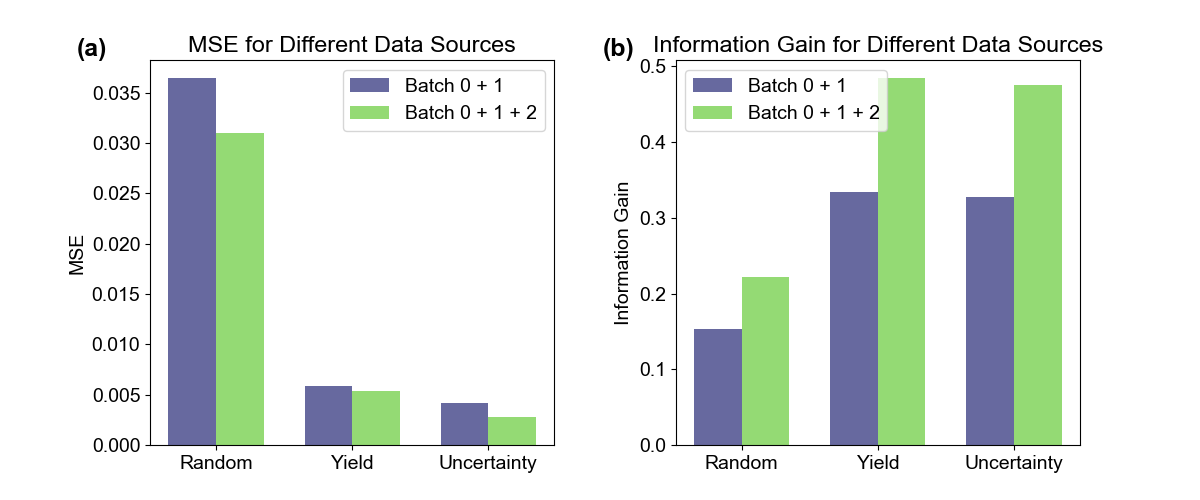

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data_sources = ['Random', 'Yield', 'Uncertainty']
colors = plt.get_cmap('viridis')(np.linspace(0.2, 0.8, 2))

mse_values_1 = [random_mse_1, high_yield_mse_1, high_uncertainty_mse_1]
mse_values_2 = [random_mse_2, high_yield_mse_2, high_uncertainty_mse_2]

inf_gain_values_1 = [random_inf_gain_1, high_yield_gain_1, high_uncertainty_gain_1]
inf_gain_values_2 = [random_inf_gain_2, high_yield_gain_2, high_uncertainty_gain_2]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bar_width = 0.35
opacity = 0.8

# Adjust positions for 'batch 1' and 'batch 2' bars
bar_positions_1 = np.arange(len(data_sources))
bar_positions_2 = [x + bar_width for x in bar_positions_1]

# Plot MSE
axes[0].bar(bar_positions_1, mse_values_1, color=colors[0], width=bar_width, alpha=opacity, label='Batch 0 + 1')
axes[0].bar(bar_positions_2, mse_values_2, color=colors[1], width=bar_width, alpha=opacity, label='Batch 0 + 1 + 2')

axes[0].set_title('MSE for Different Data Sources')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(bar_positions_1 + bar_width / 2)
axes[0].set_xticklabels(data_sources)
axes[0].text(-0.18, 1.01, "(a)", transform=axes[0].transAxes, size=18, weight='bold')

# Plot Information Gain
axes[1].bar(bar_positions_1, inf_gain_values_1, color=colors[0], width=bar_width, alpha=opacity, label='Batch 0 + 1')
axes[1].bar(bar_positions_2, inf_gain_values_2, color=colors[1], width=bar_width, alpha=opacity, label='Batch 0 + 1 + 2')

axes[1].set_title('Information Gain for Different Data Sources')
axes[1].set_ylabel('Information Gain')
axes[1].set_xticks(bar_positions_1 + bar_width / 2)
axes[1].set_xticklabels(data_sources)
axes[1].text(-0.18, 1.01, "(b)", transform=axes[1].transAxes, size=18, weight='bold')

# Add legends and space between subplots
axes[0].legend()
axes[1].legend()

plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


## Shap analysis on GPR model

  0%|          | 0/64 [00:00<?, ?it/s]

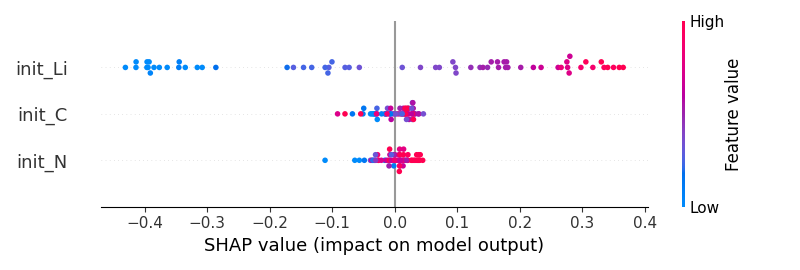

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming batch_0_2 and target are defined
# For demonstration, using batch_0_2_ext as the features subset
features = batch_0_2[['init_C', 'init_N', 'init_Li']]  # Example subset
target = batch_0_2['yield']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Setup and fit a Gaussian Process Regressor model
kernel = Matern(length_scale=1.0, nu=1.5)
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42)
gpr_model.fit(features_scaled, target)

# Using Kernel Explainer to explain predictions of the GPR model
explainer = shap.KernelExplainer(gpr_model.predict, features_scaled)
shap_values = explainer.shap_values(features_scaled)

# Plot the SHAP values
plt.figure()
shap.summary_plot(shap_values, features)



Higher values of init_Li (pink dots) are generally associated with an increase in the model's output, while lower values (blue dots) tend to decrease the model's output. The spread of the dots along the x-axis also suggests varying impacts on the model's output, with a cluster of high-impact points towards the right.

For init_C, there's a cluster of pink dots slightly to the left of the zero line, indicating that higher values of init_C slightly decrease the model's output. However, there are also a few high init_C values that have a positive impact.

init_N exhibits a more centered clustering around the zero line, implying that it has a less pronounced impact on the model's output compared to init_Li. 

## Shap Analysis on RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
# Example subset of features and target
features = batch_0_2[['init_C', 'init_N', 'init_Li']]  # Replace with your actual features
target = batch_0_2['yield']  # Replace with your actual target

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Setup and fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features_scaled, target)

# Now, perform SHAP analysis
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(features_scaled)

# Plot the SHAP values - Summary Plot
shap.summary_plot(shap_values, features, feature_names=features.columns)

# For detailed visualization, use a SHAP dependence plot for a single feature
# shap.dependence_plot('init_C', shap_values, features, feature_names=features.columns)


## RF Feature Importance Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming batch_0_2 and your setup is correctly configured above
batch_0_2_ext = batch_0_2[['init_C', 'init_N', 'init_Li']]  # Example subset

# Setup and fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees
rf_model.fit(batch_0_2_ext, batch_0_2['yield'])  # Fit model

# Get feature importance
feature_importances = rf_model.feature_importances_

# Plot feature importance
features = batch_0_2_ext.columns
indices = np.argsort(feature_importances)[::-1]  # Sort feature importances in descending order

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")

bars = plt.bar(range(batch_0_2_ext.shape[1]), feature_importances[indices], color="b", align="center")

# Add text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom')  # Adjust va and position as needed

plt.xticks(range(batch_0_2_ext.shape[1]), features[indices], rotation=90)
plt.xlim([-1, batch_0_2_ext.shape[1]])
plt.show()



In [ ]:
def ternary_dataframe_plot(df, col_a, col_b, col_c, c_label):
    
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 14
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    plot_data = ax.scatter(df[col_a], df[col_b], df[col_c], c=df[c_label], cmap='viridis', marker='o', s=250)
    cbar = fig.colorbar(plot_data)
    
    ax.set_xlabel(col_a, labelpad=10)
    ax.set_ylabel(col_b, labelpad=10)
    ax.set_zlabel(col_c, labelpad=10)
    cbar.ax.set_ylabel(c_label, labelpad=10)
    
    ax.view_init(elev=30, azim=45)  # Set the viewing angle
    
    plt.title('3D scatter plot of {}'.format(c_label))
    
    fig.tight_layout()
    plt.show()

In [ ]:
exp_grid_feasibility

init_C  init_N   init_Li  fact_check  gpr_yield_0  gpr_std_0  \
0          0.0     0.0  0.000000       False     0.000000   0.583695   
1          0.0     0.0  0.122449       False     0.000000   0.566262   
2          0.0     0.0  0.244898       False     0.000000   0.549841   
3          0.0     0.0  0.367347       False     0.000000   0.534668   
4          0.0     0.0  0.489796       False     0.000000   0.520952   
...        ...     ...       ...         ...          ...        ...   
124995     6.0     6.0  5.510204       False     0.194996   0.957276   
124996     6.0     6.0  5.632653       False     0.188161   0.960195   
124997     6.0     6.0  5.755102       False     0.181382   0.962966   
124998     6.0     6.0  5.877551       False     0.174679   0.965591   
124999     6.0     6.0  6.000000       False     0.168070   0.968072   

        gpr_yield_0_1  gpr_std_0_1  gpr_yield_0_2  gpr_std_0_2  
0            0.000000     0.350580       0.000054     0.003159  
1            0.000000     0.329162       0.000000     0.022552  
2            0.000000     0.308457       0.000000     0.042506  
3            0.000000     0.288734       0.000000     0.067471  
4            0.000000     0.270340       0.000000     0.090356  
...               ...          ...            ...          ...  
124995       0.422627     0.812615       0.464366     0.743693  
124996       0.417323     0.818106       0.452310     0.757238  
124997       0.411620     0.823704       0.439831     0.770756  
124998       0.405553     0.829386       0.427019     0.784141  
124999       0.399155     0.835132       0.413958     0.797299  

[125000 rows x 10 columns]

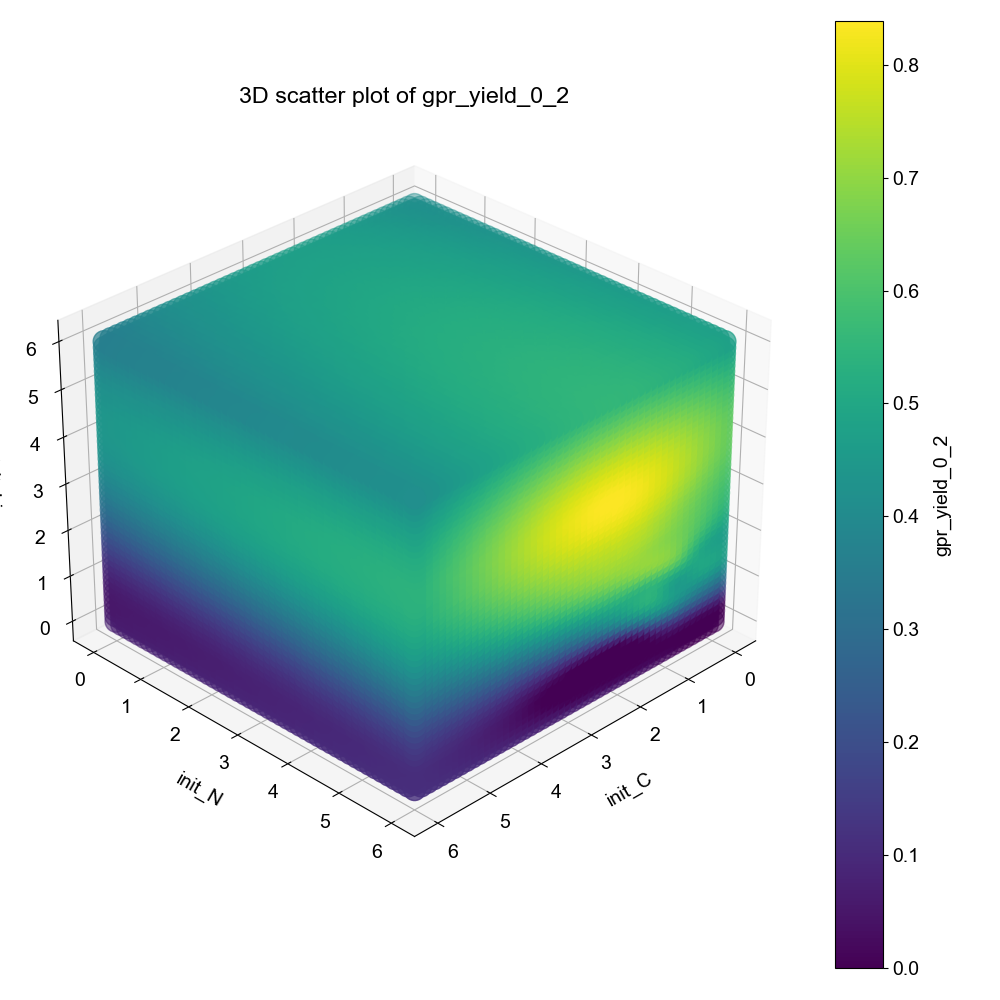

In [ ]:

ternary_dataframe_plot(exp_grid_feasibility, 'init_C', 'init_N', 'init_Li', 'gpr_yield_0_2')
plt.tight_layout()

# Cross Validation Between Multiple Models

In [55]:
batch0.head()

Sample_id  init_C  init_N  init_Li   T   fini_Li     yield acq_policy
0  CS-NRCan-014_A1     0.5     4.5      1.0  66  0.720406  0.279594        EXP
1  CS-NRCan-014_A2     1.0     4.5      1.0  66  0.660309  0.339691        EXP
2  CS-NRCan-014_A3     1.5     4.5      1.0  66  0.735669  0.264331        EXP
3  CS-NRCan-014_A5     1.0     6.0      1.0  66  0.621322  0.378678        EXP
4  CS-NRCan-014_A6     1.5     6.0      1.0  66  0.655983  0.344017        EXP

In [56]:
batch_0_1.head()

Sample_id  init_C  init_N  init_Li   T   fini_Li     yield acq_policy
0  CS-NRCan-014_A1     0.5     4.5      1.0  66  0.720406  0.279594        EXP
1  CS-NRCan-014_A2     1.0     4.5      1.0  66  0.660309  0.339691        EXP
2  CS-NRCan-014_A3     1.5     4.5      1.0  66  0.735669  0.264331        EXP
3  CS-NRCan-014_A5     1.0     6.0      1.0  66  0.621322  0.378678        EXP
4  CS-NRCan-014_A6     1.5     6.0      1.0  66  0.655983  0.344017        EXP

In [57]:
batch_0_2.head()

Sample_id  init_C  init_N  init_Li   T   fini_Li     yield acq_policy
0  CS-NRCan-014_A1     0.5     4.5      1.0  66  0.720406  0.279594        EXP
1  CS-NRCan-014_A2     1.0     4.5      1.0  66  0.660309  0.339691        EXP
2  CS-NRCan-014_A3     1.5     4.5      1.0  66  0.735669  0.264331        EXP
3  CS-NRCan-014_A5     1.0     6.0      1.0  66  0.621322  0.378678        EXP
4  CS-NRCan-014_A6     1.5     6.0      1.0  66  0.655983  0.344017        EXP

In [68]:
data = [batch[['init_C', 'init_N', 'init_Li']] for batch in [batch0, batch_0_1, batch_0_2]]

In [71]:
# Data Preprocessing
scalers = [StandardScaler().fit(batch[['init_C', 'init_N', 'init_Li']]) for batch in [batch0, batch_0_1, batch_0_2]]
scaled_batches = [scaler.transform(batch[['init_C', 'init_N', 'init_Li']]) for scaler, batch in zip(scalers, [batch0, batch_0_1, batch_0_2])]

yields = [batch['yield'].values.ravel() for batch in [batch0, batch_0_1, batch_0_2]]  # Ensure target is 1D


In [66]:
yields[0]

array([0.27959404, 0.33969112, 0.26433073, 0.37867819, 0.34401739,
       0.50427825, 0.54927838, 0.50817662, 0.49741281, 0.45539348,
       0.54679838, 0.49555453, 0.48033367, 0.61147128, 0.50827438,
       0.64215096, 0.65268452])

## Model Hyperparameter Tuning

In [154]:
# Define and instantiate models
kernels = [Matern(length_scale=[1.0, 1.0, 1.0], nu=1.5) for _ in range(3)]
gpr_models = [GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10) for kernel in kernels]
rfr_models = [RandomForestRegressor() for _ in range(3)]
xgb_models = [XGBRegressor(objective='reg:squarederror') for _ in range(3)]
svr_models = [SVR() for _ in range(3)]

# Hyperparameter grids
rfr_param_grid = {
    'n_estimators': [10, 20],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, 5, 10, 20, 30, None]
}
xgb_param_grid = {
    'n_estimators': [10, 20, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, None]
}
svr_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly']
}
length_scale_options = [1.0, 10.0]
gpr_param_grid = {
    'kernel': [Matern(length_scale=[ls1, ls2, ls3], nu=1.5) for ls1 in length_scale_options for ls2 in length_scale_options for ls3 in length_scale_options],
    'alpha': [1e-5, 1e-8]
}

# Apply GridSearchCV for hyperparameter tuning
for i in range(3):
    # Random Forest Regressor
    grid_search_rfr = GridSearchCV(rfr_models[i], rfr_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search_rfr.fit(scaled_batches[i], yields[i])
    rfr_models[i] = grid_search_rfr.best_estimator_
    print(i, 'Random Forest tuned:', rfr_models[i])
    
    # XGBoost Regressor
    grid_search_xgb = GridSearchCV(xgb_models[i], xgb_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search_xgb.fit(scaled_batches[i], yields[i])
    xgb_models[i] = grid_search_xgb.best_estimator_
    print(i, 'XGBoost tuned:', xgb_models[i])

    # Support Vector Regressor
    grid_search_svr = GridSearchCV(svr_models[i], svr_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search_svr.fit(scaled_batches[i], yields[i])
    svr_models[i] = grid_search_svr.best_estimator_
    print(i, 'SVR tuned:', svr_models[i])

    # Gaussian Process Regressor
    grid_search_gpr = GridSearchCV(gpr_models[i], gpr_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search_gpr.fit(scaled_batches[i], yields[i])
    gpr_models[i] = grid_search_gpr.best_estimator_
    print(i, 'GPR tuned:', gpr_models[i])


Fitting 5 folds for each of 24 candidates, totalling 120 fits
0 Random Forest tuned: RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=20)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
0 XGBoost tuned: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Fitting 5 folds for e

In [155]:
print(rfr_models[0],
      '\n',rfr_models[1],
      '\n', rfr_models[2])

RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=20) 
 RandomForestRegressor(max_features='auto', n_estimators=20) 
 RandomForestRegressor(max_features='auto', n_estimators=20)


In [156]:
print(xgb_models[0],
      '\n',xgb_models[1],
      '\n', xgb_models[2])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, fe

In [169]:
print(svr_models[0],
      '\n',svr_models[1],
      '\n', svr_models[2])

SVR(C=0.1, gamma='auto', kernel='poly') 
 SVR(C=1, gamma='auto') 
 SVR(C=1, gamma='auto')


In [162]:
print(gpr_models)
print()
print(gpr_models[0].kernel_,"\n",
      gpr_models[1].kernel_,"\n",
      gpr_models[2].kernel_)

[GaussianProcessRegressor(alpha=1e-05,
                         kernel=Matern(length_scale=[1, 1, 1], nu=1.5),
                         n_restarts_optimizer=10), GaussianProcessRegressor(alpha=1e-05,
                         kernel=Matern(length_scale=[1, 10, 1], nu=1.5),
                         n_restarts_optimizer=10), GaussianProcessRegressor(alpha=1e-08,
                         kernel=Matern(length_scale=[10, 1, 10], nu=1.5),
                         n_restarts_optimizer=10)]

Matern(length_scale=[4.97, 29.1, 9.87], nu=1.5) 
 Matern(length_scale=[5.32, 13, 4.88], nu=1.5) 
 Matern(length_scale=[6.99, 12.4, 2.78], nu=1.5)


## Saving models

In [170]:
import os
import pickle

# Ensure the directory exists
models_dir = "models/model_comparisons"
os.makedirs(models_dir, exist_ok=True)

# Pickle and save each model
for i, model in enumerate(rfr_models):
    with open(f"{models_dir}/rfr_model_{i}.pkl", "wb") as f:
        pickle.dump(model, f)

for i, model in enumerate(xgb_models):
    with open(f"{models_dir}/xgb_model_{i}.pkl", "wb") as f:
        pickle.dump(model, f)

for i, model in enumerate(svr_models):
    with open(f"{models_dir}/svr_model_{i}.pkl", "wb") as f:
        pickle.dump(model, f)

for i, model in enumerate(gpr_models):
    with open(f"{models_dir}/gpr_model_{i}.pkl", "wb") as f:
        pickle.dump(model, f)

print("All models have been saved successfully.")


All models have been saved successfully.


## 5-fold CV Model Comparison

In [188]:
results_dict = {}
batches = [batch0, batch_0_1, batch_0_2]

for batch_index, batch_i in enumerate(batches):
    batch_name = f"batch_{batch_index}"
    batch_dict = {}
    gpr_dict = {}
    rfr_dict = {}
    xgb_dict = {}
    svr_dict = {}

    for r_state in range(10):
        k_fold = KFold(n_splits=5, shuffle=True, random_state=r_state)
        gpr_scores = []
        rfr_scores = []
        xgb_scores = []
        svr_scores = []

        for train_index, test_index in k_fold.split(batch_i):
            X_train, X_test = batch_i[['init_C', 'init_N', 'init_Li']].iloc[train_index], batch_i[['init_C', 'init_N', 'init_Li']].iloc[test_index]
            y_train, y_test = batch_i['yield'].iloc[train_index], batch_i['yield'].iloc[test_index]

            # Scale data for GPR and SVR
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # GPR Model
            gpr = gpr_models[batch_index]
            gpr.fit(X_train_scaled, y_train)
            y_pred_gpr = gpr.predict(X_test_scaled)
            gpr_scores.append(mean_squared_error(y_test, y_pred_gpr))

            # RFR Model
            rfr = rfr_models[batch_index]
            rfr.fit(X_train, y_train)
            y_pred_rfr = rfr.predict(X_test)
            rfr_scores.append(mean_squared_error(y_test, y_pred_rfr))

            # XGB Model
            xgb = xgb_models[batch_index]
            xgb.fit(X_train, y_train)
            y_pred_xgb = xgb.predict(X_test)
            xgb_scores.append(mean_squared_error(y_test, y_pred_xgb))

            # SVR Model
            svr = svr_models[batch_index]
            svr.fit(X_train_scaled, y_train)
            y_pred_svr = svr.predict(X_test_scaled)
            svr_scores.append(mean_squared_error(y_test, y_pred_svr))

        gpr_dict[f'seed_{r_state}'] = gpr_scores
        rfr_dict[f'seed_{r_state}'] = rfr_scores
        xgb_dict[f'seed_{r_state}'] = xgb_scores
        svr_dict[f'seed_{r_state}'] = svr_scores

    batch_dict['GPR'] = gpr_dict
    batch_dict['RFR'] = rfr_dict
    batch_dict['XGB'] = xgb_dict
    batch_dict['SVR'] = svr_dict
    results_dict[batch_name] = batch_dict


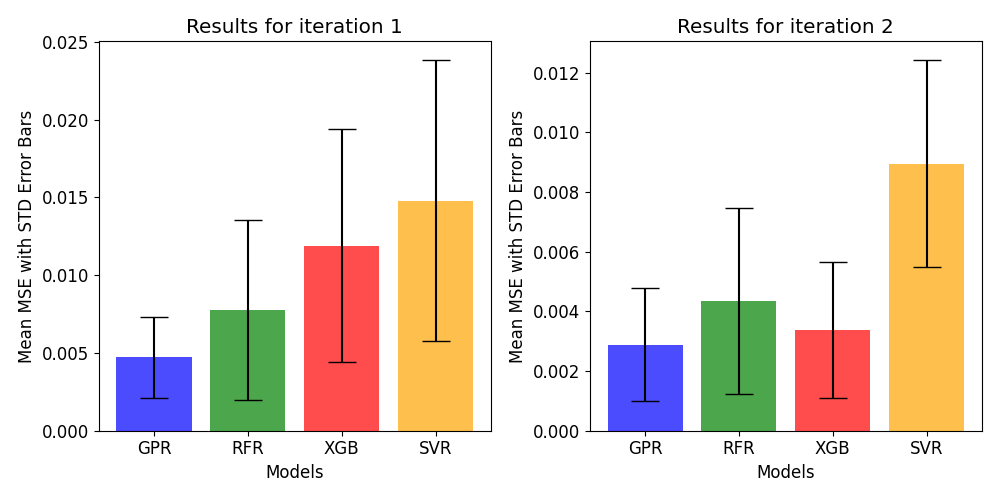

In [189]:
# Assuming 'results_dict' is already filled with the MSE scores
# Let's first calculate the mean and standard deviation for each model in each batch
mean_scores = {}
std_scores = {}

# Colors for each model
colors = {'GPR': 'blue', 'RFR': 'green', 'XGB': 'red', 'SVR': 'orange'}

for batch, models in results_dict.items():
    mean_scores[batch] = {}
    std_scores[batch] = {}
    
    for model_name, seeds in models.items():
        # Collect all MSE scores across seeds for current model
        all_scores = [score for seed_scores in seeds.values() for score in seed_scores]
        
        # Calculate mean and standard deviation of MSE
        mean_scores[batch][model_name] = np.mean(all_scores)
        std_scores[batch][model_name] = np.std(all_scores)

# Select the batches to plot, skip 'batch0'
batches_to_plot = ['batch_1', 'batch_2']

# Setup the plot
fig, axes = plt.subplots(nrows=1, ncols=len(batches_to_plot), figsize=(10, 5))
# Set the global font size
mpl.rcParams.update({'font.size': 12})  # Adjust the number as needed
# Ensure axes is always a list
if len(batches_to_plot) == 1:
    axes = [axes]


# Loop through the selected batches and their corresponding axes
for ax, batch, it in zip(axes, batches_to_plot, [1, 2]):
    models = list(mean_scores[batch].keys())
    means = [mean_scores[batch][model] for model in models]
    stds = [std_scores[batch][model] for model in models]
    
    # Create bar plot with distinct colors
    x_pos = np.arange(len(models))
    ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.7, capsize=10, color=[colors[model] for model in models])
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models)
    ax.set_title(f'Results for iteration {it}')
    ax.set_ylabel('Mean MSE with STD Error Bars')
    ax.set_xlabel('Models')

plt.tight_layout()
plt.show()


In [171]:
results_dict = {}
batches = [batch0, batch_0_1, batch_0_2]

for batch_index, batch_i in enumerate(batches):
    batch_name = f"batch_{batch_index}"
    batch_dict = {}
    gpr_dict = {}
    rfr_dict = {}
    xgb_dict = {}
    svr_dict = {}

    for r_state in range(10):
        k_fold = KFold(n_splits=5, shuffle=True, random_state=r_state)
        gpr_scores = []
        rfr_scores = []
        xgb_scores = []
        svr_scores = []

        for train_index, test_index in k_fold.split(batch_i):
            X_train, X_test = batch_i[['init_C', 'init_N', 'init_Li']].iloc[train_index], batch_i[['init_C', 'init_N', 'init_Li']].iloc[test_index]
            y_train, y_test = batch_i['yield'].iloc[train_index], batch_i['yield'].iloc[test_index]

            # Scale data for GPR and SVR
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # GPR Model
            gpr = gpr_models[batch_index]
            gpr.fit(X_train_scaled, y_train)
            y_pred_gpr = gpr.predict(X_test_scaled)
            gpr_scores.append(r2_score(y_test, y_pred_gpr))

            # RFR Model
            rfr = rfr_models[batch_index]
            rfr.fit(X_train, y_train)
            y_pred_rfr = rfr.predict(X_test)
            rfr_scores.append(r2_score(y_test, y_pred_rfr))

            # XGB Model
            xgb = xgb_models[batch_index]
            xgb.fit(X_train, y_train)
            y_pred_xgb = xgb.predict(X_test)
            xgb_scores.append(r2_score(y_test, y_pred_xgb))

            # SVR Model
            svr = svr_models[batch_index]
            svr.fit(X_train_scaled, y_train)
            y_pred_svr = svr.predict(X_test_scaled)
            svr_scores.append(r2_score(y_test, y_pred_svr))

        gpr_dict[f'seed_{r_state}'] = gpr_scores
        rfr_dict[f'seed_{r_state}'] = rfr_scores
        xgb_dict[f'seed_{r_state}'] = xgb_scores
        svr_dict[f'seed_{r_state}'] = svr_scores

    batch_dict['GPR'] = gpr_dict
    batch_dict['RFR'] = rfr_dict
    batch_dict['XGB'] = xgb_dict
    batch_dict['SVR'] = svr_dict
    results_dict[batch_name] = batch_dict


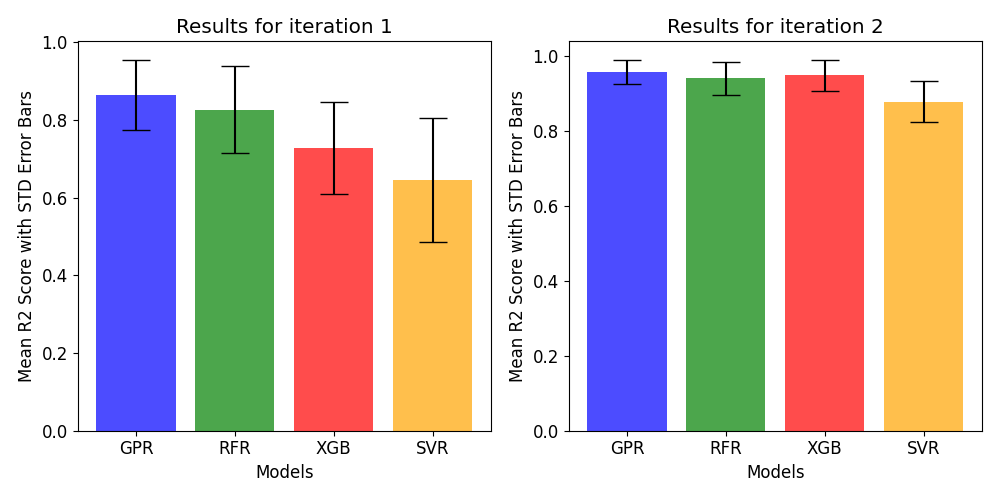

In [187]:
# Assuming 'results_dict' is already filled with the R2 scores
# Let's first calculate the mean and standard deviation for each model in each batch
mean_scores = {}
std_scores = {}

# Colors for each model
colors = {'GPR': 'blue', 'RFR': 'green', 'XGB': 'red', 'SVR': 'orange'}

for batch, models in results_dict.items():
    mean_scores[batch] = {}
    std_scores[batch] = {}
    
    for model_name, seeds in models.items():
        # Collect all R2 scores across seeds for current model
        all_scores = [score for seed_scores in seeds.values() for score in seed_scores]
        
        # Calculate mean and standard deviation of R2 scores
        mean_scores[batch][model_name] = np.mean(all_scores)
        std_scores[batch][model_name] = np.std(all_scores)

# Select the batches to plot, skip 'batch0'
batches_to_plot = ['batch_1', 'batch_2']

# Setup the plot
fig, axes = plt.subplots(nrows=1, ncols=len(batches_to_plot), figsize=(10, 5))  # Adjusted size for clarity
# Set the global font size
mpl.rcParams.update({'font.size': 12})  # Adjust the number as needed
# Ensure axes is always a list
axes = np.atleast_1d(axes)  # More robust way to handle a single subplot scenario

# Loop through the selected batches and their corresponding axes
for ax, batch, it in zip(axes, batches_to_plot, [1,2]):
    models = list(mean_scores[batch].keys())
    means = [mean_scores[batch][model] for model in models]
    stds = [std_scores[batch][model] for model in models]
    
    # Create bar plot with distinct colors
    x_pos = np.arange(len(models))
    ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.7, capsize=10, color=[colors[model] for model in models])
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models)
    ax.set_title(f'Results for iteration {it}')
    ax.set_ylabel('Mean R2 Score with STD Error Bars')
    ax.set_xlabel('Models')

plt.tight_layout()
plt.show()